### Imports y rcParams

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
from matplotlib import rcParams

import utilities as ut

COLOR = 'black'
plt.style.use("default")
rcParams["font.family"] = "serif"
rcParams["mathtext.fontset"] = "cm"
rcParams['figure.figsize'] = (18, 10)
rcParams['figure.titlesize'] = 20
rcParams['figure.dpi'] = 50
rcParams['axes.facecolor'] = 'lightgray'
rcParams['legend.fontsize'] = 25
rcParams['axes.titlesize'] = 60
rcParams['axes.labelsize'] = 50
rcParams['ytick.labelsize'] = 20
rcParams['xtick.labelsize'] = 20
rcParams['text.color'] = COLOR
rcParams['text.color'] = COLOR
rcParams['axes.labelcolor'] = COLOR
rcParams['xtick.color'] = COLOR
rcParams['ytick.color'] = COLOR
rcParams['grid.color'] = COLOR
rcParams['text.latex.preamble'] = "\n".join([
    r'\usepackage[version=3]{mhchem}'
])

THRESHOLD = 120
MAX_PIXEL_VALUE = 255


### Ejemplo del tratamiento para un frame

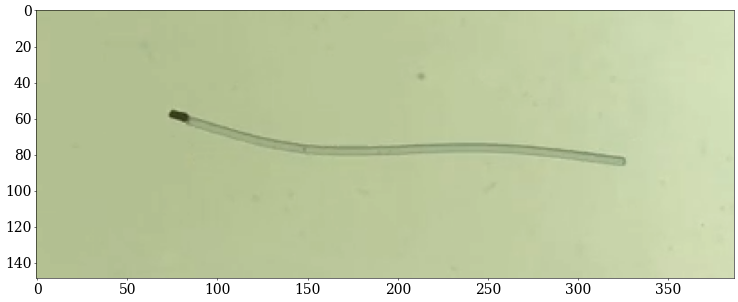

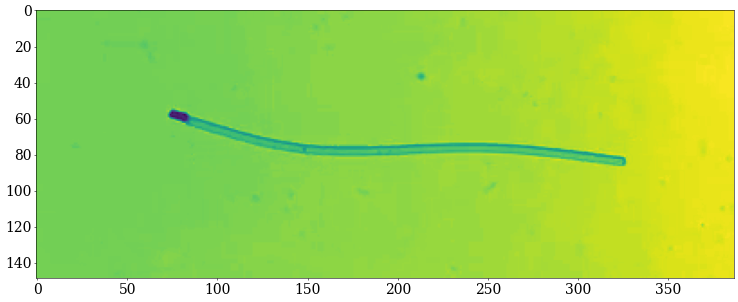

In [2]:
im = cv.imread('example_media/filamento.png')
plt.figure()
plt.imshow(im)

im_gray = ut.gris(im)
plt.figure()
plt.imshow(im_gray)

Como la cola es más clara que la cabeza hay que cambiar el threshold al binarizar, pero así como está no hay suficiente resolución en la escala de valores. Para solucionar eso enmascaramos la cabeza del nadador de la imagen y renormalizamos la imagen por su máximo y mínimo valor (función guillotina).  

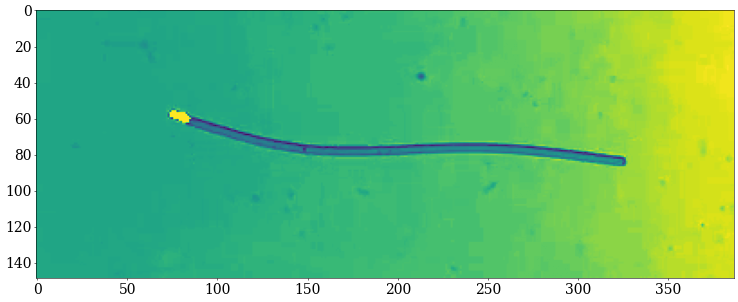

In [3]:
im_decap = ut.guillotina(im_gray)
plt.figure()
plt.imshow(im_decap)

En muchos de los frames al binarizar la cola queda con "huecos" y se ve el contorno de la cabeza. Además aparecen agujeros en el fondo. Se corrige binarizando con la función _binarize_tail_.

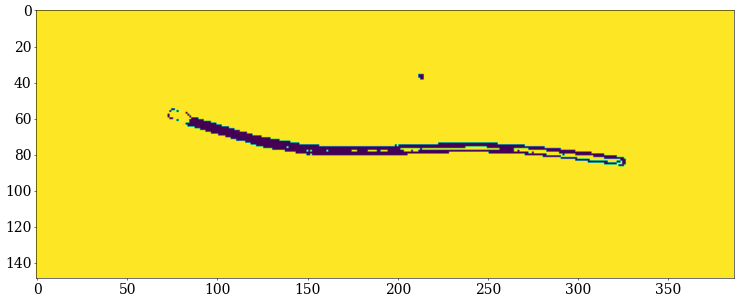

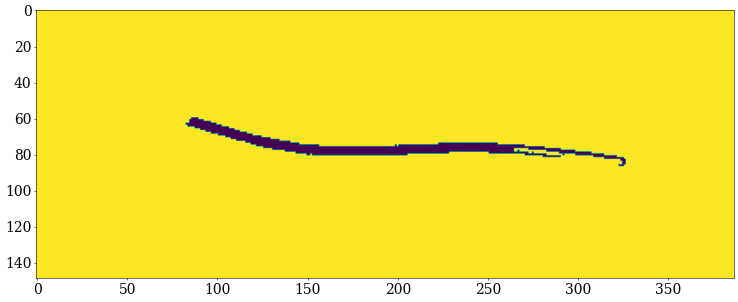

In [4]:
im_binary = ut.gray_then_binarize(im_decap)
plt.figure()
plt.imshow(im_binary)

im_binary = ut.binarize_tail(im_decap)
plt.figure()
plt.imshow(im_binary)

Como el filamento tiene bastantes píxeles de diámetro al aplicar directamente _skeletonize_ aparecen ramas que conectan con el contorno, o incluso "globos" si al binarizar quedó alguna mancha clara sin rellenar en el interior del filamento y saltos poco suaves, que no reflejan la forma general de la cola. Se corrige en la función _skeleton_.

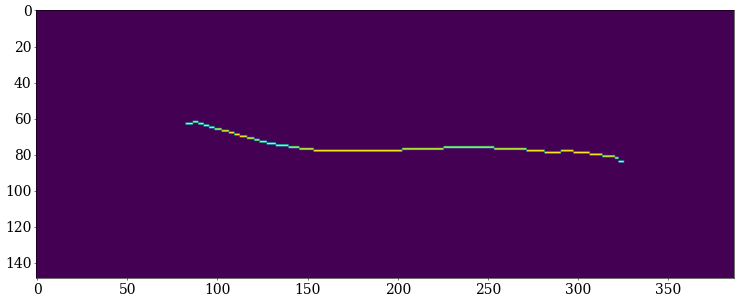

In [5]:
im_sk, _ = ut.skeleton(im_binary)
plt.figure()
plt.imshow(im_sk)

### Ejemplo con video (ECO20 45mm 1,00Vpp 7,66Hz)

Antes de que se abra y después de que se cierre la ventana del video analizado hay un tiempo de espera por los frames donde la cola no está entera (o directamente no está) que no se analizan. Hay que dejar que termine de correr para que se guarden los datos. Por eso registramos cuáles son los frames efectivamente analizados; es necesario para relacionar correctamente la forma de la cola con los datos de posición de la cabeza.

In [6]:
video = cv.VideoCapture('example_media/ECO20-45mm-2,00Vpp-8Hz.mp4')
limites = [319, 950, 250, 505]

sk, tail, last_frame = ut.track_tail(video, limites, SHOW=True)

Termina en frame 196
